In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


## Actividad 5

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import cv2 as cv

### 1. Leer dos imagenes y asignarlas a dos variables en python

In [54]:
man_img = cv.imread('manzana.jpg')
per_img = cv.imread('pera.jpg')

### 2. Mostrar la forma del arreglo que contiene la imagen

In [56]:
man_img.shape

(260, 260, 3)

In [57]:
per_img.shape

(600, 600, 3)

### 3. Obtener los valores de intensidad maximos y minimos de las imagenes

In [59]:
def get_pixel_info(image):
    min_pix_info = image.min(axis=(0,1))
    max_pix_info = image.max(axis=(0,1))
    print('==Minimos==')
    print(f'Pixel con menor intensidad en el canal Blue: {min_pix_info[0]}')
    print(f'Pixel con menor intensidad en el canal Green: {min_pix_info[1]}')
    print(f'Pixel con menor intensidad en el canal Red: {min_pix_info[2]}')
    print('==Maximos==')
    print(f'Pixel con mayor intensidad en el canal Blue: {max_pix_info[0]}')
    print(f'Pixel con mayor intensidad en el canal Green: {max_pix_info[1]}')
    print(f'Pixel con mayor intensidad en el canal Red: {max_pix_info[2]}')
    

In [60]:
get_pixel_info(man_img)

==Minimos==
Pixel con menor intensidad en el canal Blue: 0
Pixel con menor intensidad en el canal Green: 0
Pixel con menor intensidad en el canal Red: 21
==Maximos==
Pixel con mayor intensidad en el canal Blue: 255
Pixel con mayor intensidad en el canal Green: 255
Pixel con mayor intensidad en el canal Red: 255


In [61]:
get_pixel_info(per_img)

==Minimos==
Pixel con menor intensidad en el canal Blue: 0
Pixel con menor intensidad en el canal Green: 21
Pixel con menor intensidad en el canal Red: 30
==Maximos==
Pixel con mayor intensidad en el canal Blue: 255
Pixel con mayor intensidad en el canal Green: 255
Pixel con mayor intensidad en el canal Red: 255


### 4. Muestra las imágenes en tu notebook. Nota que los colores no se ven como deberían ser. Realiza la conversión necesaria para que las imágenes se muestren como son

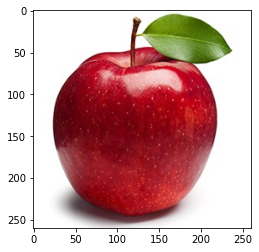

In [62]:
man_img_color = cv.cvtColor(man_img, cv.COLOR_BGR2RGB)
plt.imshow(man_img_color, cmap='gray')

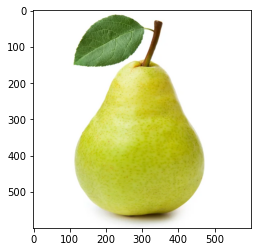

In [63]:
per_img_color = cv.cvtColor(per_img, cv.COLOR_BGR2RGB)
plt.imshow(per_img_color, cmap='gray')

### 5. Modificar las imagenes para que se muestren en escala de grises

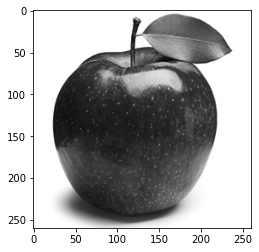

In [64]:
man_img_gray = cv.cvtColor(man_img, cv.COLOR_BGR2GRAY)
plt.imshow(man_img_gray, cmap='gray')

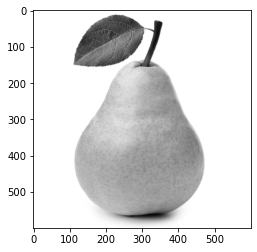

In [65]:
per_img_gray = cv.cvtColor(per_img, cv.COLOR_BGR2GRAY)
plt.imshow(per_img_gray, cmap='gray')

### 6. Redimensiona las imagenes modificando el factor de escala en el eje horizontal a 2 usando interpolaciones INTER_NEAREST e INTER_CUBIC

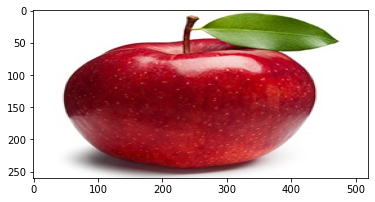

In [133]:
# INTER_NEAREST
man_img_escala = cv.resize(man_img_color, None, fx=2, fy=1, interpolation=cv.INTER_NEAREST)
plt.imshow(man_img_escala, cmap='gray')


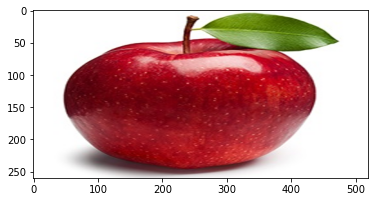

In [134]:
# INTER_CUBIC
man_img_escala = cv.resize(man_img_color, None, fx=2, fy=1, interpolation=cv.INTER_CUBIC)
plt.imshow(man_img_escala, cmap='gray')

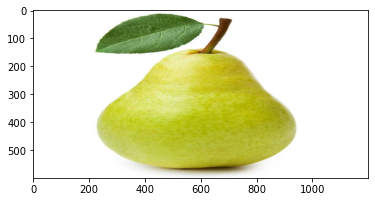

In [139]:
# INTER_NEAREST 
per_img_escala = cv.resize(per_img_color, None, fx=2, fy=1, interpolation=cv.INTER_NEAREST)
plt.imshow(per_img_escala, cmap='gray')

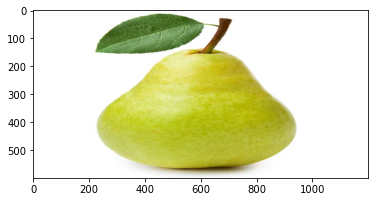

In [140]:
# INTER_CUBIC 
per_img_escala = cv.resize(per_img_color, None, fx=2, fy=1, interpolation=cv.INTER_CUBIC)
plt.imshow(per_img_escala, cmap='gray')

### 7. Redimensiona las imágenes originales modificando solo el factor de escala en el eje vertical a 2, usa las interpolaciones INTER_NEAREST e INTER_CUBIC

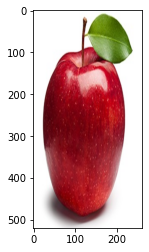

In [135]:
# INTER_NEAREST
man_img_escala = cv.resize(man_img_color, None, fx=1, fy=2, interpolation=cv.INTER_NEAREST)
plt.imshow(man_img_escala, cmap='gray')

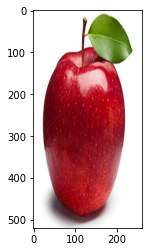

In [136]:
# INTER_CUBIC
man_img_escala = cv.resize(man_img_color, None, fx=1, fy=2, interpolation=cv.INTER_CUBIC)
plt.imshow(man_img_escala, cmap='gray')

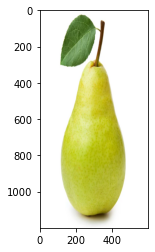

In [141]:
# INTER_NEAREST 
per_img_escala = cv.resize(per_img_color, None, fx=1, fy=2, interpolation=cv.INTER_NEAREST)
plt.imshow(per_img_escala, cmap='gray')

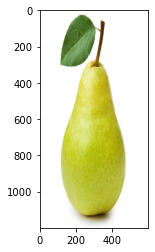

In [142]:
# INTER_CUBIC 
per_img_escala = cv.resize(per_img_color, None, fx=1, fy=2, interpolation=cv.INTER_CUBIC)
plt.imshow(per_img_escala, cmap='gray')

### 8. Ejecuta un desplazamiento de 50 pixeles sobre el eje horizontal de las imágenes originales

In [93]:
def traslacion_img(img, tras_horizontal=0, tras_vertical=0):
    matriz_tras = np.array([[1,0,tras_horizontal], [0,1,tras_vertical]], dtype=np.float32)
    img_tras = cv.warpAffine(src=img, M=matriz_tras, dsize=img.shape[:2])
    plt.imshow(img_tras, cmap='gray')

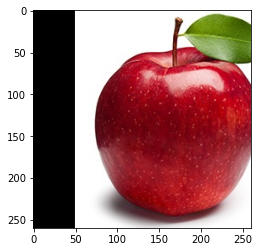

In [137]:
traslacion_img(man_img_color, tras_horizontal=50)

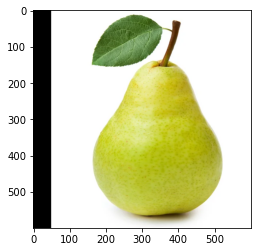

In [143]:
traslacion_img(per_img_color, tras_horizontal=50)

### 9. Realiza una rotación de 45 grados de las imágenes originales

In [105]:

def rotacion_img(img, rot_grad):
    alto, ancho = img.shape[:2]

    esq_sup_izq = (0,0,1)
    esq_inf_izq = (alto,0,1)
    esq_sup_der = (0,ancho,1)
    esq_inf_der = (alto,ancho,1)
    
    centro = (ancho//2, alto//2)
    
    matriz_rot = cv.getRotationMatrix2D(centro, -rot_grad, 1) 
     
    esq_orig = [esq_sup_izq, esq_inf_izq, esq_sup_der, esq_inf_der]
    esq_nueva = [np.matmul(matriz_rot, pt) for pt in esq_orig]
    
    min_x = np.min([pt[0] for pt in esq_nueva])
    max_x = np.max([pt[0] for pt in esq_nueva])
    
    min_y = np.min([pt[1] for pt in esq_nueva])
    max_y = np.max([pt[1] for pt in esq_nueva])
    
    dim_nueva = (int(max_y-min_y), int(max_x-min_x))
    
    centro_nuevo = (dim_nueva[0]//2, dim_nueva[1]//2)
    tras_centro = (centro_nuevo[0]-centro[0], centro_nuevo[1]-centro[1])
    
    matriz_rot[0][2] += tras_centro[0]
    matriz_rot[1][2] += tras_centro[1]
    
    img_rot = cv.warpAffine(img, matriz_rot, dim_nueva)
    plt.imshow(img_rot, cmap='gray')
    

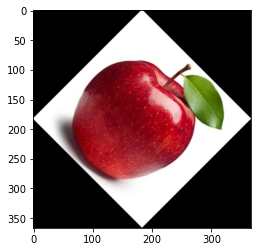

In [138]:
rotacion_img(man_img_color, 45)

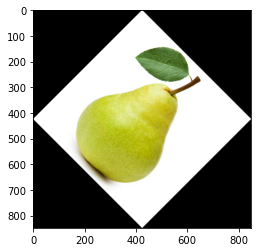

In [144]:
rotacion_img(per_img_color, 45)

### Conclusion
OpenCV es una librería bastante poderosa la cual nos permite importar imágenes, mostrarlas a color o en escala de grises, realizar procesamiento a las imágenes, aplicar transformaciones, traslación, rotación, etc. Esta librería se ha vuelto muy popular debido a su funcionalidad, ser multiplataforma y además open source.